# Datascience

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. ***Vous souhaitez prédire la réussite ou non d'un projet .*** Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

**Bon courage !**


## Faire les imports nécessaires (dépendances)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importer le fichier csv

In [2]:
df = pd.read_csv('dataset.csv')

## Visualiser brièvement le dataset

In [3]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


## Gérer les données manquantes

On voit en premier lieu que majeur partie des données manquantes visent l'état du financement du projet, bien que pour certaines d'entre elles le montant visé et le montant finançé permettent d'établir ce statut. 

In [4]:

nd = df[df.isna().any(axis=1)]
nd

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [5]:
# On suppose que projet successful si le montant réel obtenu (converti en dollar)
# est supérieur ou égal au montant réel demandé (converti en dollar lui aussi)
nd['state'][nd['pledged'] >= nd['goal']] = 'successful'
nd

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,successful,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,successful,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,successful,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,successful,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,successful,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,successful,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,successful,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,successful,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,successful,0,"N,0""",NaN,1585.00,1200.00


In [6]:
nd[nd['usd_pledged_real'] == 0].tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
375347,982862687,Bydlo - A Novel,Publishing,Publishing,GBP,2015-06-01,3000.0,2015-04-02 12:51:16,0.0,undefined,0,"N,0""",NaN,0.0,4599.39
375980,986253191,"DEVELOP MAGAZINE FOR THE ARTS, MUSIC, AND DESI...",Publishing,Publishing,USD,2015-02-28,5000.0,2015-01-29 17:43:13,0.0,undefined,0,"N,0""",NaN,0.0,5000.00
377638,994911312,"""Songwriter assistance"" service",Music,Music,CAD,2014-12-22,5000.0,2014-11-22 00:56:04,0.0,undefined,0,"N,0""",NaN,0.0,4313.32
378011,996908566,The World Needs More Big Thinkers,Publishing,Publishing,USD,2015-09-13,8000.0,2015-07-30 03:01:31,0.0,undefined,0,"N,0""",NaN,0.0,8000.00
378588,999621278,Jeune auteur a besoin de vous!,Publishing,Publishing,EUR,2015-11-20,1600.0,2015-10-21 21:28:13,0.0,undefined,0,"N,0""",NaN,0.0,1710.08


Dans les cellules ou le montant financé est à 0, une bonne partie a réalisé un nouveau financement auparavant ou va en réalise run nouveau ==> vérifier la proximité temporelle entre deux doublons.

In [7]:
df[df['name'].isin(df['name'][df['name'].duplicated()])].sort_values("name")

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1,US,25.00,1.00,100000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9,US,7248.00,7248.00,20000.00
149726,1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.0,2014-07-29 13:12:21,11260.0,canceled,7,US,11260.00,11260.00,15000.00
196363,1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.0,2016-05-07 01:56:36,0.0,canceled,0,"N,0""",NaN,0.00,5000.00
353421,870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.0,2015-09-02 00:03:02,1100.0,undefined,0,"N,0""",NaN,1100.00,1100.00


In [8]:
outliers_state = df[df['pledged'] >= df['goal']].groupby('state')
outliers_state_bis = df[df['usd_pledged_real'] >= df['usd_goal_real']].groupby('state')

In [9]:
outliers_state.count()
# équivalents
#outliers_state_bis.count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,,,,,,,,
canceled,698,698,698,698,698,698,698,698,698,698,698,697,698,698
failed,6,6,6,6,6,6,6,6,6,6,6,6,6,6
live,441,441,441,441,441,441,441,441,441,441,441,441,441,441
successful,133951,133951,133951,133951,133951,133951,133951,133951,133951,133951,133951,133846,133951,133951
suspended,292,292,292,292,292,292,292,292,292,292,292,292,292,292
undefined,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,0,1654,1654


In [10]:
otl_state = df[df['pledged'] <= df['goal']].groupby('state')
otl_state.count()
# Anomalies dans les deux sens. Mériterait une analyse plus poussée
# Comment des projets non financés dans leur entièreté peuvent être en statut 'successful'

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,,,,,,,,
canceled,38129,38129,38129,38129,38129,38129,38129,38129,38129,38129,38129,38108,38129,38129
failed,197715,197712,197715,197715,197715,197715,197715,197715,197715,197715,197715,197610,197715,197715
live,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2369,2370,2370
successful,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4057,4062,4062
suspended,1559,1558,1559,1559,1559,1559,1559,1559,1559,1559,1559,1557,1559,1559
undefined,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,0,1980,1980


## Analyse uni et multi-variée

In [11]:
montant_finance_category = df.pivot_table(values='pledged', index='category', columns='state').sort_values('successful', ascending=False)
montant_finance_category

# De même pour main_category

state,canceled,failed,live,successful,suspended,undefined
category,,,,,,
3D Printing,12407.049121,7067.437699,2026.596250,184708.313017,30845.184667,13757.0
Camera Equipment,6472.510000,8860.340759,2266.750000,173269.814323,16173.833333,NaN
Wearables,15019.205475,6429.139758,115756.093478,171121.403711,41627.440909,NaN
Fabrication Tools,7738.412222,2758.919463,5267.500000,170928.556970,8.750000,NaN
Gaming Hardware,4556.781053,2053.699687,976.000000,164793.179495,1336.131579,NaN
Sound,11726.230000,6554.248953,13398.785714,152517.915474,7268.250000,NaN
Flight,14514.589464,3406.344712,68064.050000,131517.503553,2722.897500,NaN
Hardware,14473.160189,6630.071991,62784.520000,118865.553491,13826.651277,NaN
Gadgets,7848.537314,4717.468148,20838.180217,101887.612031,23156.711429,NaN


==> Les catégories comprenant le plus de projets sont "Films & Video" ainsi que "Music".

In [12]:
print(len(df['category'].unique()))
df['category'].unique()

159


array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [13]:
print(len(df['main_category'].unique()))
df['main_category'].unique()

15


array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

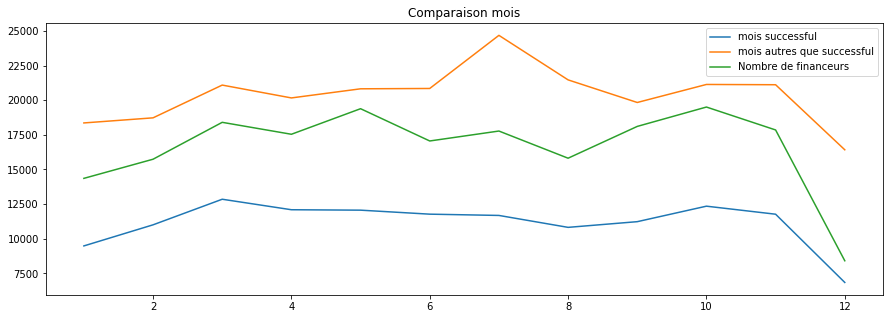

In [14]:
df['launched'] = pd.to_datetime(df['launched'])
df['month'] = df['launched'].dt.month
successful = df[df['state'] == 'successful']['month'].value_counts().rename('mois successful').sort_index()
other_than_successful = df[df['state'] != 'successful']['month'].value_counts().rename('mois autres que successful').sort_index()

nv_df = pd.concat([successful, other_than_successful], axis=1, join='inner')
nv_df['Nombre de financeurs'] = df.groupby('month').aggregate(lambda x:x.sum()/200)['backers']
nv_df.plot(figsize=(15, 5), legend=True, title='Comparaison mois')

On peut voir que les mois autour d'été sont les pires mois pour lancer un projet kickstarter.
Les mains categoryles plus financées sont Films & Music.
les sous-categories dans lesquelles lancer un projet sont 3D printing, Camera Equipment, Wearables, Fabrication Tools, Gaming Hardware